In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [69]:
data = pd.read_csv("train.csv")

## DBSCAN 寻找离群点
考虑到DBSCAN聚类需要数据为二维，结合Titanic数据集所拥有的数据，我将每个乘客的年龄和所买票价相结合，寻找离群点

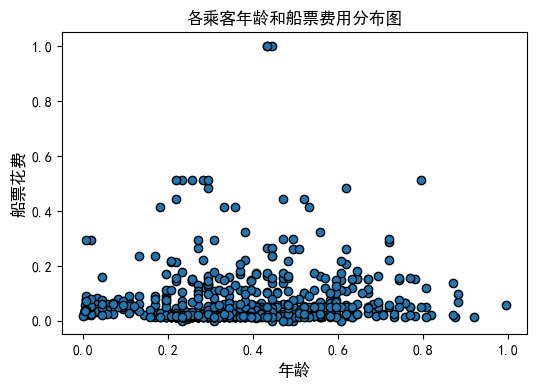

In [70]:
# 预处理标准化数据
import numpy as np
from sklearn.cluster import DBSCAN

index = np.isnan(data.Age)
fare = (np.array(data.Fare[index==False])-min(data.Fare))/max(data.Fare)
age = (np.array(data.Age[index==False])-min(data.Age))/max(data.Age)

fig = plt.figure(dpi = 100)
plt.scatter(age,fare,edgecolors = [0,0,0,1])
plt.title("各乘客年龄和船票费用分布图",size = 12)
plt.xlabel("年龄",size = 12)
plt.ylabel("船票花费",size = 12)
plt.show()

### 我们选择不同大小的eps对相同数据进行聚类，可以观察到，随着eps增大，聚类个数减少

当eps为 0.1时，聚类个数为: 2


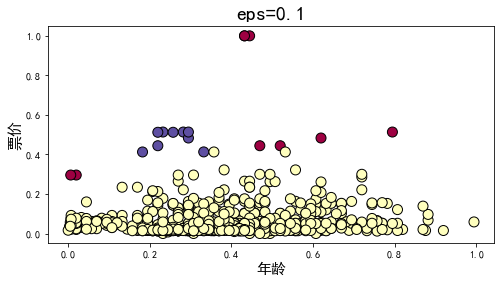

当eps为 0.5时，聚类个数为: 1


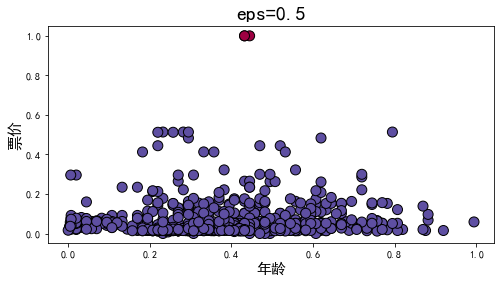

In [71]:
def DBSCAN_cluster(data,eps):
    db = DBSCAN(eps=eps).fit(data)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('当eps为 {}时，聚类个数为: {}'.format(eps,n_clusters_))
    labels = db.labels_
    labels = labels.reshape(-1,1)

    data = np.hstack((data,labels))
    plt.scatter(data[:,0],data[:,1],c = data[:,2],cmap = plt.cm.Spectral,edgecolors = [0,0,0,1],s = 100)
    plt.xlabel("年龄",size = 15)
    plt.ylabel("票价",size = 15)
    plt.title("eps={}".format(eps),size=20)
    plt.show()

age_fare = np.vstack((age,fare)).T

### eps = 0.1，类间离散程度较小
plt.figure(figsize = (8,4))
DBSCAN_cluster(age_fare,0.1)

### eps = 0.5，类间离散程度较大
plt.figure(figsize = (8,4))
DBSCAN_cluster(age_fare,0.5)


上方两图都用了DBSCAN的聚类方法，但聚类结果不同，这是由于：

第一幅图的eps较小，类间距离小，因此聚类数量多

第二幅图的eps较大，类间距离大，因此聚类数量少


## Iforest 寻找离群点
接着我们使用sklearn包，对年龄和票价分别和共同进行聚类操作，结果如下

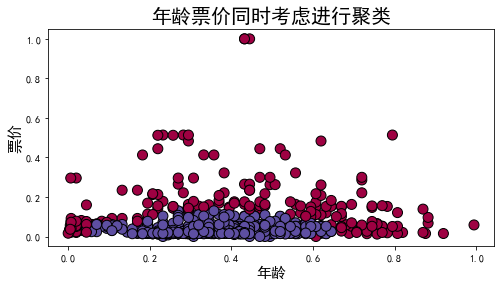

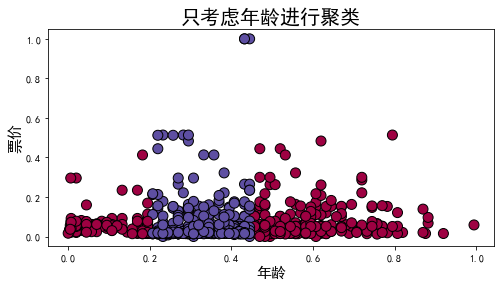

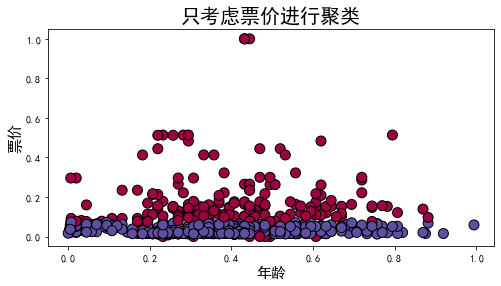

In [72]:
from sklearn.ensemble import IsolationForest

def Iforest_cluster(data):
    clf = IsolationForest(max_samples=100)
    clf.fit(data)  
    labels = clf.predict(data)
    labels = labels.reshape(-1,1)
    plt.scatter(age_fare[:,0],age_fare[:,1],c = labels,cmap = plt.cm.Spectral,edgecolors = [0,0,0,1],s = 100)
    plt.xlabel("年龄", size = 15)
    plt.ylabel("票价", size = 15)

### 年龄票价同时考虑进行聚类
plt.figure(figsize=(8,4))
Iforest_cluster(age_fare)
plt.title("年龄票价同时考虑进行聚类", size=20)
plt.show()

### 只考虑年龄进行聚类
plt.figure(figsize=(8,4))
age = age.reshape(-1,1)
Iforest_cluster(age)
plt.title("只考虑年龄进行聚类", size = 20)
plt.show()

### 只考虑票价进行聚类
plt.figure(figsize=(8,4))
fare = fare.reshape(-1,1)
Iforest_cluster(fare)
plt.title("只考虑票价进行聚类", size  =  20)
plt.show()

从上方三图我们可以看到，当同时考虑年龄票价时，只有中间靠的比较近的部分被聚为一类。

只考虑年龄时，聚到同一类的数据点在x轴上集中分布，与同时考虑情况显然不同。

只考虑票价时，聚到同一类的数据点在y轴上集中分布，与前两种显然不同。

这三张图反映了从不同数据中聚类的不同效果。